### Baseball Case Study Problem Statement

Baseball Case Study
Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

For downloading the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

### Importing Liberary

In [96]:
#Data Lib
import numpy as np
import pandas as pd

#Visualization lib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Preprocessing lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
#tunning lib
from sklearn.model_selection import GridSearchCV
#metrics

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

#save

import pickle

import warnings
warnings.filterwarnings("ignore")

### Data Loading

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
data.shape

(30, 17)

We have only 30 observations and 16 features , target W is continious data so its regression problem.

### Duplicacy Test

In [4]:
data.duplicated().sum()

0

No duplicacy in data set

### Categorical & Null Testing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

All values are numeric type & no null values

### Describe Dataset

In [7]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


As here also we can see dataset have equal observations in all features. data set looks good.

### Correlation & multicollinearty Test

In [8]:
data.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


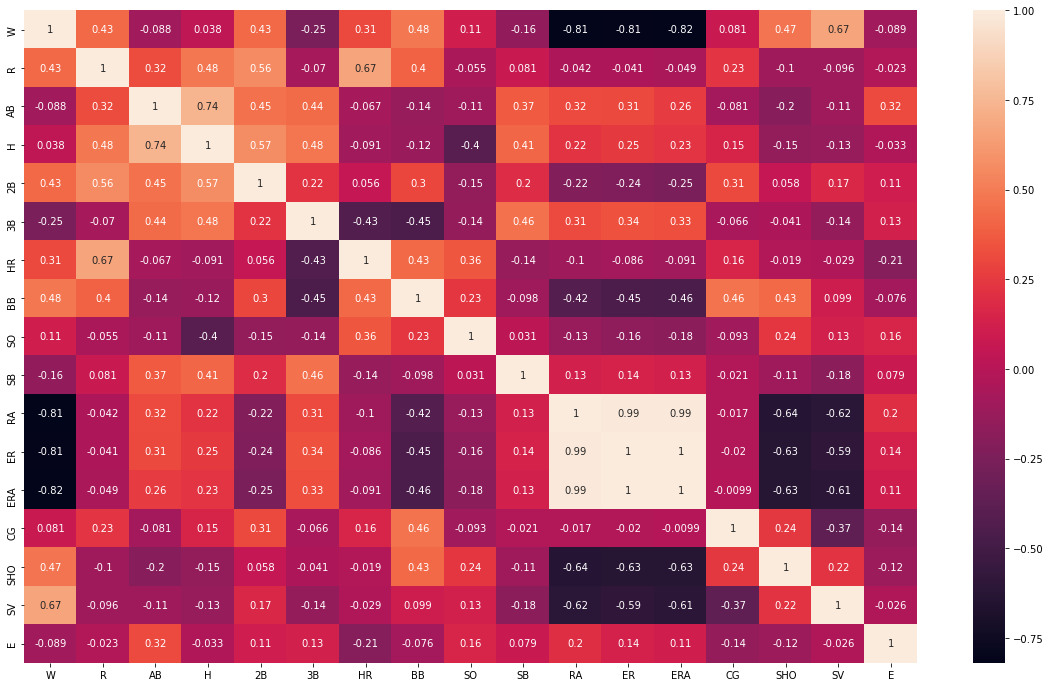

In [9]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(), annot=True)
plt.show()

5 Features having strong positive correlation with target W ,more the 0.40.

3 Features having strong negative correlation with target W ,more the 0.80.

4 Features having very less relation within range of (0.1 to -0.1)
multicollinearity problem also clearly showing in dataset, these 3 featues are strongly correlated (ERA,RA,ER), so we can keep 1 feature out of 3.

### Distribution Plot

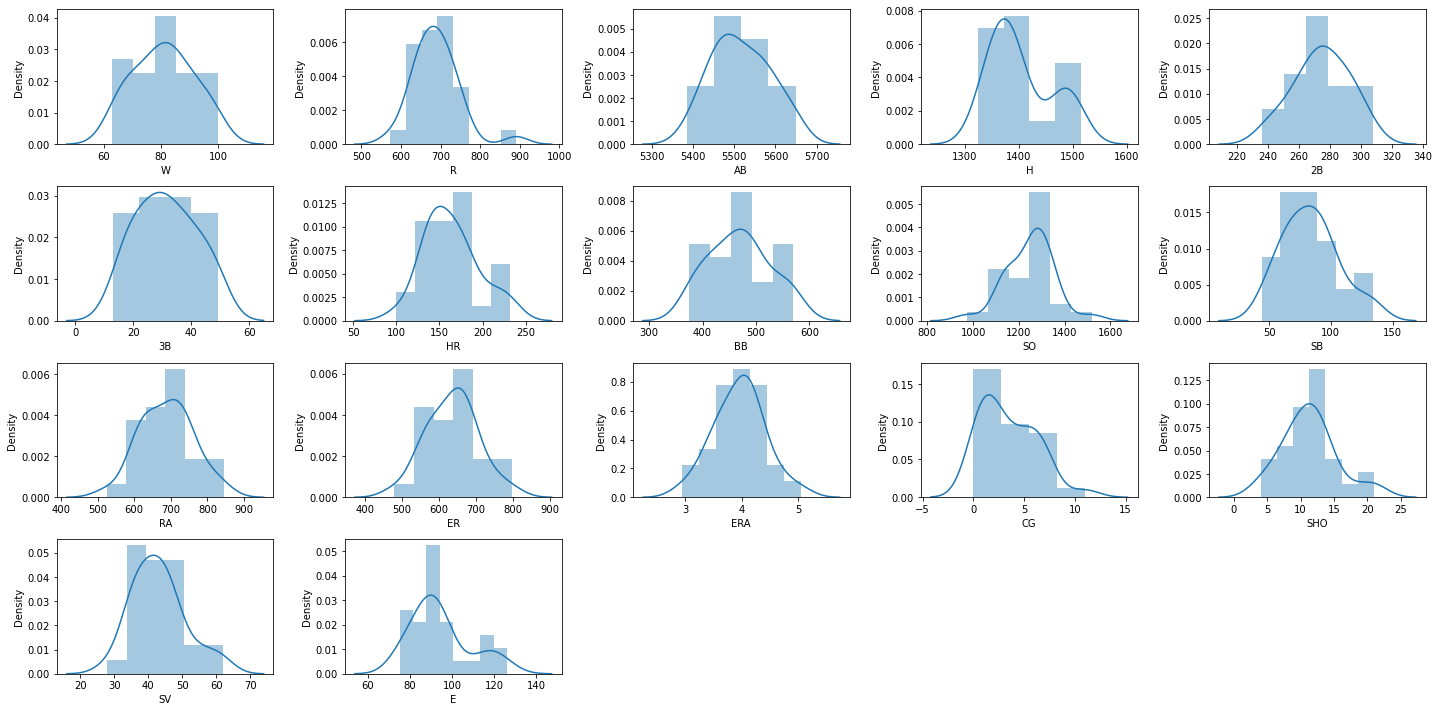

In [10]:
plt.figure(figsize=(20,10))

plotnumber=1

for col in data :
    if plotnumber<=17:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(data[col])
        
    plotnumber+=1
    
plt.tight_layout()

As we have very less data points but still all features near to normally distribution. few features are bit skewed will check it.

### Skewness

In [11]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

features i.e. R,E,CG which skewed right but we cant afford any loss in data points.

### Boxplot for Outliers Testing

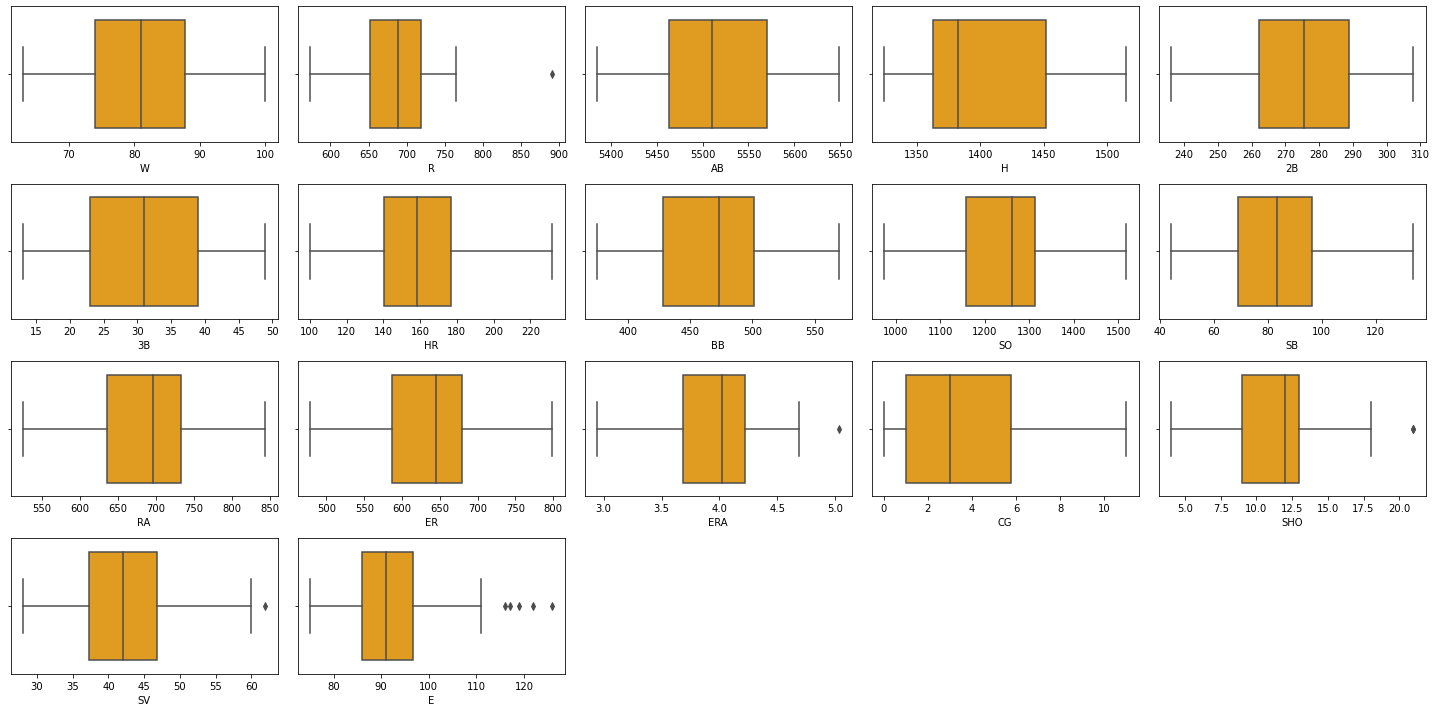

In [12]:
plt.figure(figsize=(20,10))

plotnumber=1

for col in data:
    if plotnumber<=17:
        ax=plt.subplot(4,5,plotnumber)
        sns.boxplot(data[col],color='orange')
        
    plotnumber+=1
    
plt.tight_layout()

feature E having few outliers rest all are good to go. will continue with same data.

### Upsampling

as we have very less dataset so performing upsampling, with less number of observation model can lead to overfit. 

In [247]:
from sklearn.utils import resample

upsample=resample(data,replace=True,n_samples=200,random_state=22)

### Split Dataset

In [248]:
X=upsample.drop(columns=['W'])
y=upsample.W

### Scaling

In [249]:
scaler=StandardScaler()
x_scale=scaler.fit_transform(X)

In [250]:
x_scale.shape

(200, 16)

### Multicollinearity detection using VIF

In [251]:
#multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()

vif['vif']=[variance_inflation_factor(x_scale,i) for i in range(x_scale.shape[1])]

vif["features"]=X.columns

vif

,vif,features
0,12.080721,R
1,12.863991,AB
2,10.652565,H
3,3.520597,2B
4,4.077203,3B
5,10.976846,HR
6,4.310555,BB
7,2.969469,SO
8,2.161533,SB
9,223.963988,RA


In [252]:
X.drop(columns=['ER','ERA'],inplace=True)

In [254]:
X.shape

(200, 14)

we observed multicollinearity problem in heatmap , same result showing in vif. so removing 2 features. 

### Train Test Split

In [255]:
# testing best random state
for i in range(10,100,3):
    x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    
    print(lr.score(x_train,y_train),i)

0.9490704591390657 10
0.976727025960801 13
0.9537009890925684 16
0.9453732992592849 19
0.9473270979993849 22
0.9505173554566702 25
0.9475259334321116 28
0.9470099187310245 31
0.9501784880359937 34
0.9518797266380735 37
0.955812741565818 40
0.9446372087321906 43
0.9475450377346044 46
0.9539825761652136 49
0.9473544530509412 52
0.9525656839991833 55
0.9522623748020521 58
0.9542129686917651 61
0.9540085495067002 64
0.9520507498023307 67
0.9531602454591813 70
0.9479343598672197 73
0.954080691343589 76
0.9538650045801375 79
0.9485426187949286 82
0.9792935700635685 85
0.9600167999374049 88
0.9509420805800946 91
0.9493760016377526 94
0.9482973448814187 97


we are getting best training score wit random state 85. so will go for it. 

In [256]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.15,random_state=85)

### Model Building

In [257]:
lr=LinearRegression()
rfr=RandomForestRegressor()
knn=KNeighborsRegressor()
svm=SVR()
gbr=GradientBoostingRegressor()

In [258]:
lr.fit(x_train,y_train)
rfr.fit(x_train,y_train)
knn.fit(x_train,y_train)
svm.fit(x_train,y_train)
gbr.fit(x_train,y_train)


GradientBoostingRegressor()

### Training Score

In [259]:
print(lr.score(x_train,y_train))
print(rfr.score(x_train,y_train))
print(knn.score(x_train,y_train))
print(svm.score(x_train,y_train))
print(gbr.score(x_train,y_train))

0.9605595072364722
0.9982860932375998
0.9702210192493665
0.8661325719949702
0.9999938846173525


### Testing score(r2_score)

In [260]:
#lr score

y_pred=lr.predict(x_test)
print(r2_score(y_test,y_pred)*100)

77.47936507949632


In [261]:
#rfr score

y_pred=rfr.predict(x_test)
print(r2_score(y_test,y_pred)*100)

96.55892075471698


In [262]:
#knn score

y_pred=knn.predict(x_test)
print(r2_score(y_test,y_pred)*100)

65.80226415094339


In [263]:
#svm score

y_pred=svm.predict(x_test)
print(r2_score(y_test,y_pred)*100)

74.05045380026114


In [264]:
#gbr score

y_pred=gbr.predict(x_test)
print(r2_score(y_test,y_pred)*100)

99.9982845100332


Getting best score with gbr(GradientBoostingRegressor).. lets cross validate

### Cross Validation

In [265]:
from sklearn.model_selection import cross_val_score

In [266]:
print('cv_score for LogisticRegression: ', np.mean(cross_val_score(lr,x_train,y_train)*100))
print('\ncv_score for RandomForestRegressor: ', np.mean(cross_val_score(rfr,x_train,y_train)*100))
print('\ncv_score for SVR: ', np.mean(cross_val_score(svm,x_train,y_train)*100))
print('\ncv_score for KNN: ', np.mean(cross_val_score(knn,x_train,y_train)*100))
print('\ncv_score for GradientBoostingRegressor: ', np.mean(cross_val_score(gbr,x_train,y_train)*100))

cv_score for LogisticRegression:  92.51155166349838

cv_score for RandomForestRegressor:  98.7037326849545

cv_score for SVR:  77.24503390459014

cv_score for KNN:  89.94889608903426

cv_score for GradientBoostingRegressor:  99.18444416682358


cross validation score of GradientBoostingRegressor is highest so will be our final model

### Model Selection

we are getting best model & test score around 100% with  GradientBoostingRegressor.

GradientBoostingRegressor

In [267]:
gbr=GradientBoostingRegressor()

gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [268]:
print('R Squared score: ',r2_score(y_test,y_pred)*100)
print('\nMean squared error: ',mean_squared_error(y_test,y_pred))
print('\nMean absolute error: ',mean_absolute_error(y_test,y_pred))
print('\nRoot mean square error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

R Squared score:  99.9982845100332

Mean squared error:  0.0015153494706762853

Mean absolute error:  0.03143839155591337

Root mean square error:  0.03892748990978336


### HyperParameter Tunning

since our model performing with 100% accuracy score with default parameters. so no need to do hyperparameter tunning. 

### Model save

In [270]:
filename='Baseball_study.pickle'

pickle.dump(rfr,open(filename,'wb'))